 **THE SPARKS FOUNDATION**
 
 
 Data Science and Buisness Analytics Internship(GRIP July2021)
 
 **TASK 1**: Prediction Using Supervised ML
 
 
 **Problem**: Predict the percentage of an student based on the number of study hours
 
 
 **By**: Neeraj Sharma  

**Import Required Libraries**

In [1]:
import pandas as pd                                                #for data manupulation
import numpy as np                                                 #for numerical computation
import matplotlib.pyplot as plt                                    #for plotting graphs
import seaborn as sns                                              #for develop attractiveness of matplotlib graphics
from sklearn.model_selection import train_test_split               #for splitting dataset into train and test data
from sklearn.linear_model import LinearRegression                  #for linear_regression model
from sklearn.metrics import mean_absolute_error      


READING THE DATA

In [2]:
#Here I am Importing Data from URL link
data = pd.read_csv("http://bit.ly/w-data")
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Check if there is any null value in dataset**

In [3]:
data.isnull == True

False

There is no null value in the Dataset

So, We can now visualize our Data

VISUALIZE THE DATA

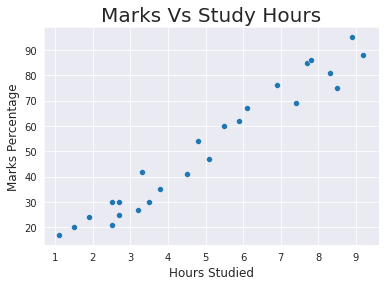

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied'

Lets plot a Regression Line to confirm the correlation

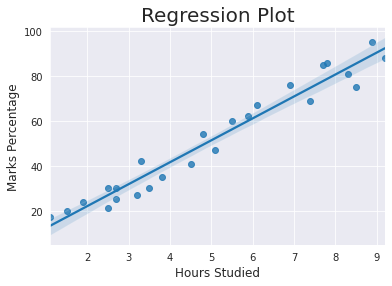

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x = data['Hours'],y = data['Scores'])
plt.title('Regression Plot', size = 20)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()
print(data.corr())

It is confirmed that variables are positively correlated

**TRAINING THE MODEL**

1) SPLITTING THE DATA

In [6]:
X = data.iloc[: , :-1].values
y = data.iloc[: , 1].values
train_X , val_X , train_y , val_y = train_test_split(X , y ,random_state = 0)


2) FITTING THE DATA INTO THE MODEL

In [7]:
regression = LinearRegression()
regression.fit(train_X , train_y)
print("------Model Trained------")

------Model Trained------


PREDICTING THE PERCENTAGE OF MARKS

In [8]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'HOURS': [i[0] for i in val_X],'Predicted Marks':[k for k in pred_y]})
prediction

,HOURS,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS

In [9]:
compare_scores = pd.DataFrame({'Actual Marks': val_y , 'Predicted Marks':pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


VISUALLY COMPARING THE PREDICTED  MARKS WITH THE ACTUAL MARKS

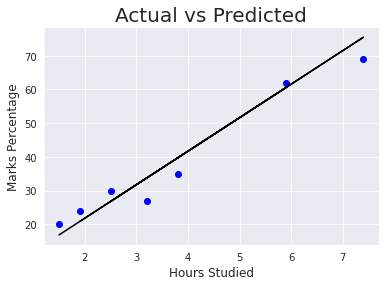

In [10]:
plt.scatter(x = val_X , y = val_y , color = 'blue')
plt.plot(val_X , pred_y , color = 'Black')
plt.title('Actual vs Predicted', size = 20)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

EVALUATING THE MODEL

In [11]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


Small value of Mean absolute error states that the chances of error or wrong forecasting through the  model are very less

**WHAT WILL BE THE PREDICTED SCORE OF A STUDENT IF HE/SHE STUDIES FOR 9.25 HOURS/DAY?**

In [12]:
hours=[9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the Regression Model if a Student Studies for 9.25 hours a day ,he/she is likely to Score 93.89 Marks

**THANKYOU!**